# Práctica 7. Ejercicio adicional 1. Comparando clasificadores gráficamente

En este notebook se pretende mostrar gráficamente una comparativa de los distintos algoritmos de clasificación utilizados en la parte obligatoria de la práctica en varios datasets sintéticos. El objetivo de este notebook es ilustrar la naturaleza de los límites de decisión de distintos clasificadores.  

Este notebook está basado en la documentación de sklearn: http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

##### Dataset en forma de luna

Comenzamos importando la funcionalidad para generar un dataset en forma de luna. 

In [1]:
from sklearn.datasets import make_moons

Generamos el dataset:

In [2]:
dataset = make_moons(noise=0.3,random_state=64)

Definimos una función que partirá el dataset en un conjunto de entrenamiento y uno de test y nos servirá para mostrar el dataset.

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

def muestra_dataset(dataset):
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')

    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
                   edgecolors='k')
    plt.show()

Mostramos nuestro dataset:

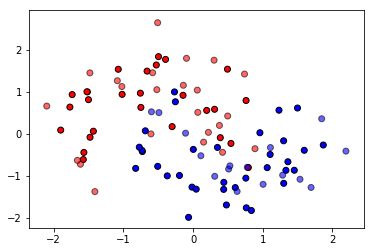

In [4]:
muestra_dataset(dataset)

El dataset anterior consta de puntos de dos tipos o clases: los puntos rojos y los puntos azules. El objetivo de los diferentes clasificadores consiste en ser capaces de definir una zona azul y una zona roja. 

A continuación se define una función que dado un clasificador y un dataset, muestra el borde de decisión para dicho clasificador en el dataset.

In [5]:
def muestra_limites(clf,dataset):
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')

    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
                   edgecolors='k')
    
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
    # and testing points
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)
    plt.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
    plt.show()

Veamos que resultados se obtienen con el algoritmo de KNN con 3 vecinos. Primero definimos el clasificador:

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(3)

A continuación llamamos a la función que entrena dicho clasificador y muestra los límites.

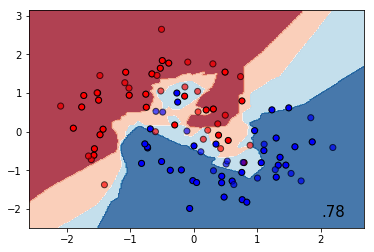

In [7]:
muestra_limites(knn,dataset)

El gráfico anterior muestra los puntos de entrenamiento en color sólido y los puntos de test de manera semi-transparente. Las regiones azul oscuro y rojo oscuro muestran las zonas de decisión que son claramente de la clase azul y de la clase roja; mientras que las zonas claras muestran la frontera de decisión. El valor que aparece abajo a la derecha es la precisión del clasificador.  

Repetimos el ejercicio con el clasificador SVM. 

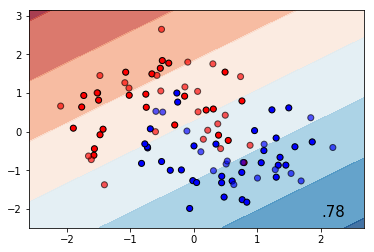

In [8]:
from sklearn.svm import SVC
svc1 = SVC(kernel="linear", C=0.025)
muestra_limites(svc1,dataset)

##### Ejercicio 
Repite el proceso visto para los algoritmos de KNN y SVM con distintos parámetros y también con el resto de algoritmos que se han visto en la parte obligatoria de la práctica. 

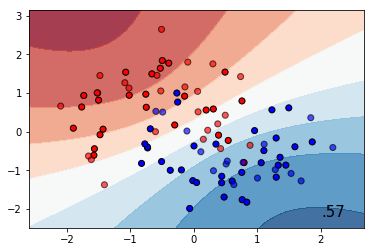

In [9]:
svc1 = SVC(kernel="sigmoid", C=0.025)
muestra_limites(svc1,dataset)

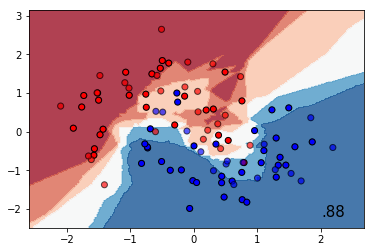

In [10]:
knn=KNeighborsClassifier(n_neighbors=5)
muestra_limites(knn,dataset)

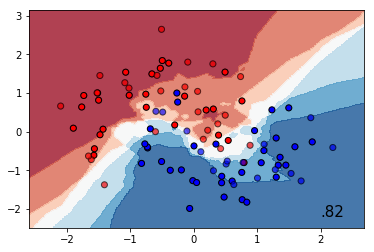

In [11]:
knn=KNeighborsClassifier(n_neighbors=7)
muestra_limites(knn,dataset)

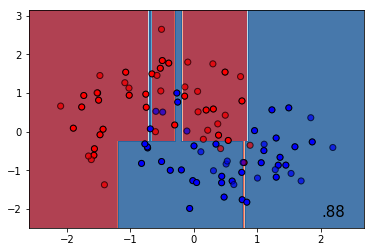

In [12]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(random_state=84)
muestra_limites(arbol, dataset)

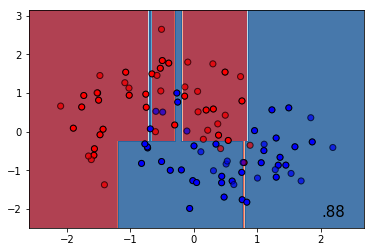

In [13]:
arbol = DecisionTreeClassifier()
muestra_limites(arbol, dataset)

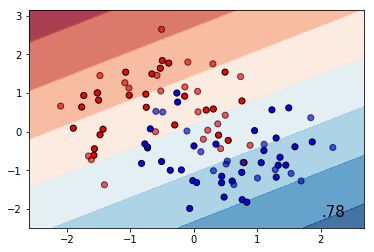

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=84)
muestra_limites(lr, dataset)

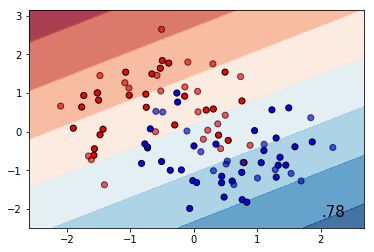

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
muestra_limites(lr, dataset)

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


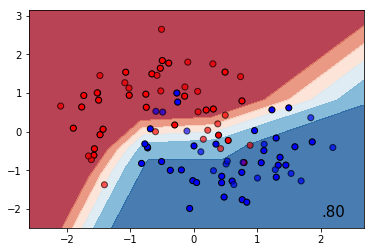

In [16]:
from sklearn.neural_network import MLPClassifier
mp = MLPClassifier(hidden_layer_sizes=(5,2),learning_rate_init=0.01,momentum=0.9)
muestra_limites(mp, dataset)

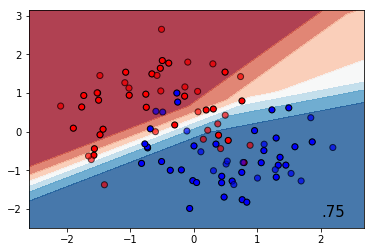

In [17]:
mp = MLPClassifier(hidden_layer_sizes=(5,4),learning_rate_init=0.1,momentum=0.8)
muestra_limites(mp, dataset)

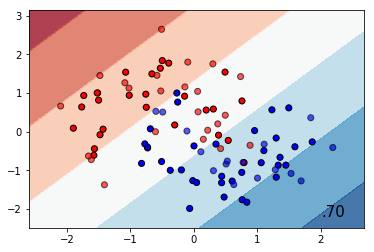

In [18]:
from sklearn.linear_model import Perceptron
p = Perceptron(max_iter=10,eta0=1.0,random_state=84)
muestra_limites(p, dataset)

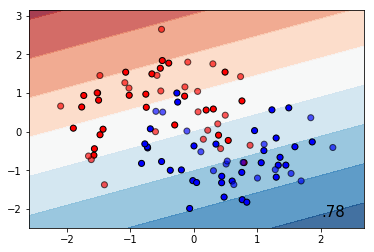

In [19]:
p = Perceptron(max_iter=50,eta0=1.0)
muestra_limites(p, dataset)

##### Ejercicio

A continuación se definen otros datasets, repite el proceso para cada uno de estos datasets utilizando distintos clasificadores.

##### Dataset de los círculos

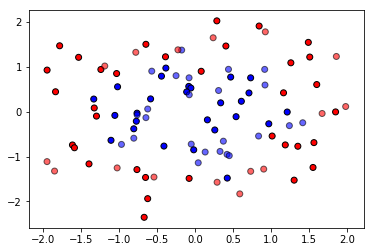

In [20]:
from sklearn.datasets import make_circles
dataset_circles = make_circles(noise=0.2, factor=0.5, random_state=1)
muestra_dataset(dataset_circles)

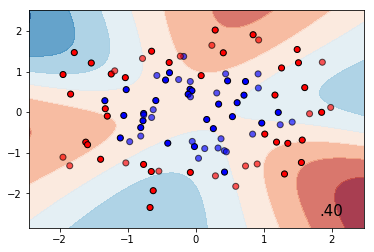

In [21]:
svc1 = SVC(kernel="sigmoid", C=0.025)
muestra_limites(svc1,dataset_circles)

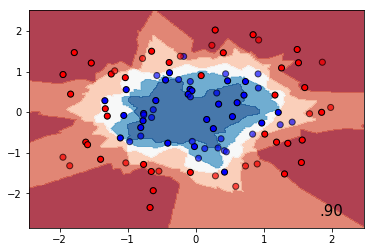

In [22]:
knn=KNeighborsClassifier(n_neighbors=5)
muestra_limites(knn,dataset_circles)

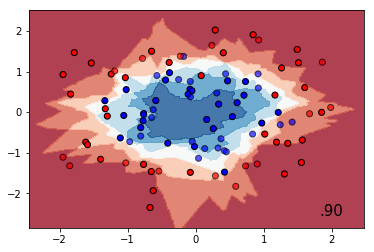

In [23]:
knn=KNeighborsClassifier(n_neighbors=7)
muestra_limites(knn,dataset_circles)

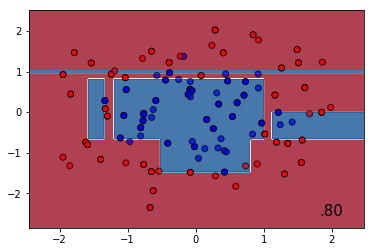

In [24]:
arbol = DecisionTreeClassifier(random_state=84)
muestra_limites(arbol, dataset_circles)

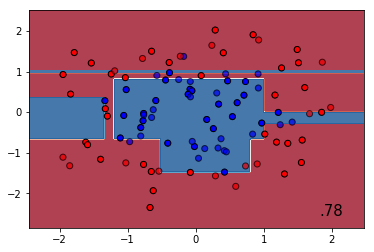

In [25]:
arbol = DecisionTreeClassifier()
muestra_limites(arbol, dataset_circles)

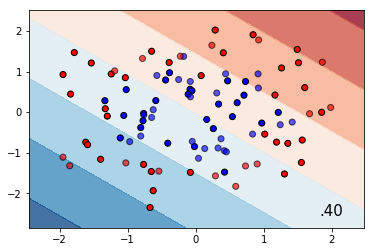

In [26]:
lr = LogisticRegression(random_state=84)
muestra_limites(lr, dataset_circles)

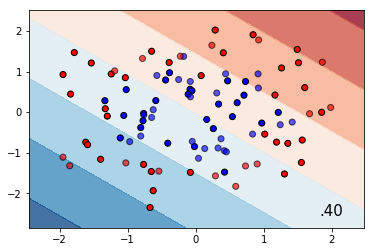

In [27]:
lr = LogisticRegression()
muestra_limites(lr, dataset_circles)

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


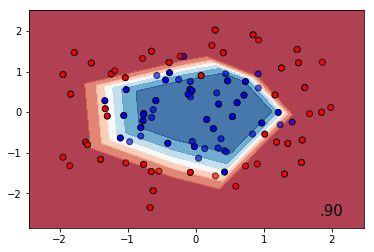

In [28]:
mp = MLPClassifier(hidden_layer_sizes=(5,2),learning_rate_init=0.01,momentum=0.9)
muestra_limites(mp, dataset_circles)

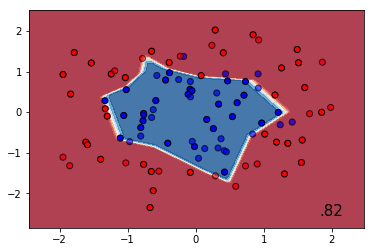

In [29]:
mp = MLPClassifier(hidden_layer_sizes=(5,4),learning_rate_init=0.1,momentum=0.8)
muestra_limites(mp, dataset_circles)

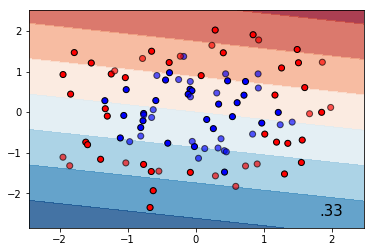

In [30]:
p = Perceptron(max_iter=10,eta0=1.0,random_state=84)
muestra_limites(p, dataset_circles)

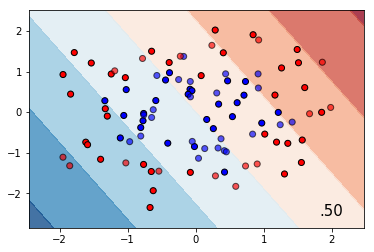

In [31]:
p = Perceptron(max_iter=50,eta0=1.0)
muestra_limites(p, dataset_circles)

##### Dataset linealmente separable

In [32]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

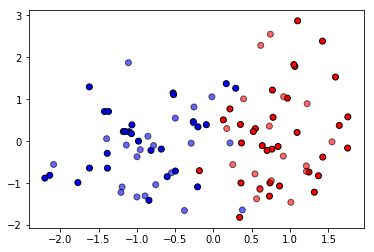

In [33]:
muestra_dataset(linearly_separable)

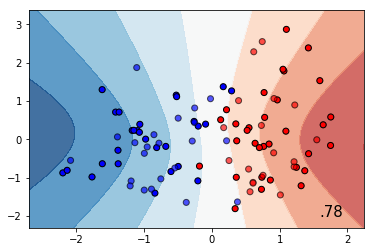

In [34]:
svc1 = SVC(kernel="sigmoid", C=0.025)
muestra_limites(svc1,linearly_separable)

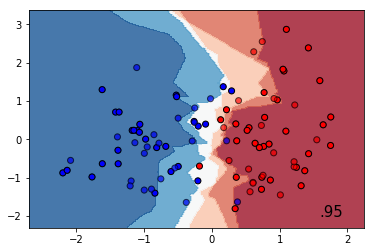

In [35]:
knn=KNeighborsClassifier(n_neighbors=5)
muestra_limites(knn,linearly_separable)

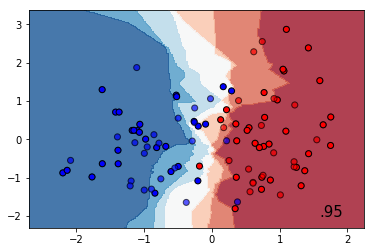

In [36]:
knn=KNeighborsClassifier(n_neighbors=7)
muestra_limites(knn,linearly_separable)

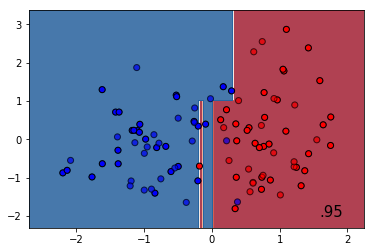

In [37]:
arbol = DecisionTreeClassifier(random_state=84)
muestra_limites(arbol, linearly_separable)

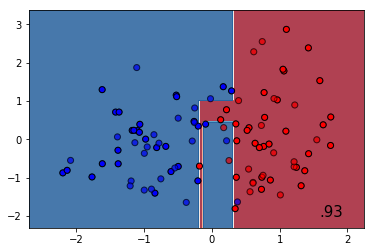

In [38]:
arbol = DecisionTreeClassifier()
muestra_limites(arbol, linearly_separable)

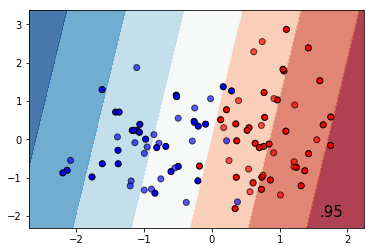

In [39]:
lr = LogisticRegression(random_state=84)
muestra_limites(lr, linearly_separable)

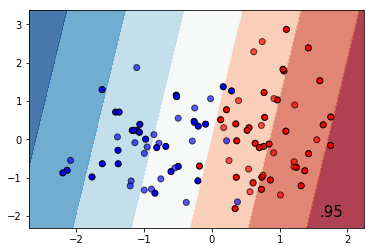

In [40]:
lr = LogisticRegression()
muestra_limites(lr, linearly_separable)

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


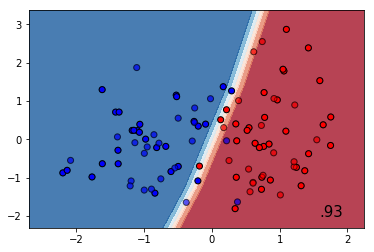

In [41]:
mp = MLPClassifier(hidden_layer_sizes=(5,2),learning_rate_init=0.01,momentum=0.9)
muestra_limites(mp, linearly_separable)

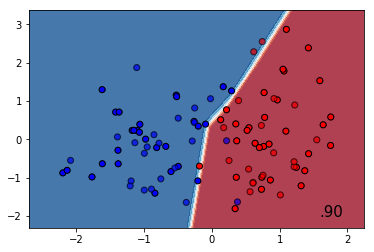

In [42]:
mp = MLPClassifier(hidden_layer_sizes=(5,4),learning_rate_init=0.1,momentum=0.8)
muestra_limites(mp, linearly_separable)

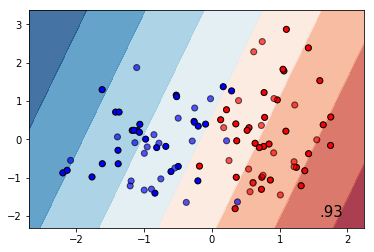

In [43]:
p = Perceptron(max_iter=10,eta0=1.0,random_state=84)
muestra_limites(p, linearly_separable)

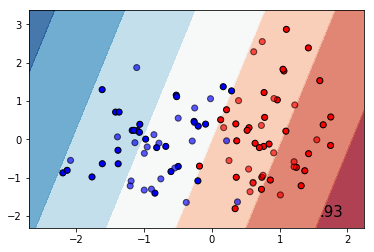

In [44]:
p = Perceptron(max_iter=50,eta0=1.0)
muestra_limites(p, linearly_separable)

##### Dataset blobs

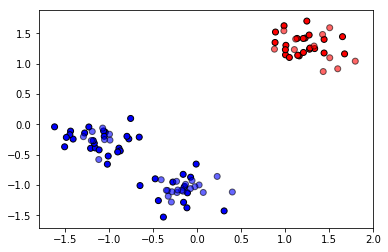

In [45]:
from sklearn.datasets import make_blobs
dataset_blobs = make_blobs(random_state=1)
muestra_dataset(dataset_blobs)

ValueError: cannot reshape array of size 140556 into shape (212,221)

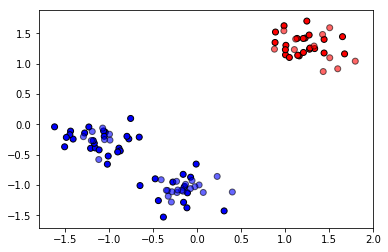

In [46]:
svc1 = SVC(kernel="sigmoid")
muestra_limites(svc1, dataset_blobs)

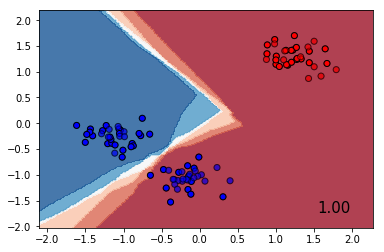

In [47]:
knn=KNeighborsClassifier(n_neighbors=5)
muestra_limites(knn,dataset_blobs)

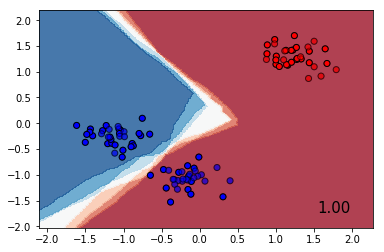

In [48]:
knn=KNeighborsClassifier(n_neighbors=7)
muestra_limites(knn,dataset_blobs)

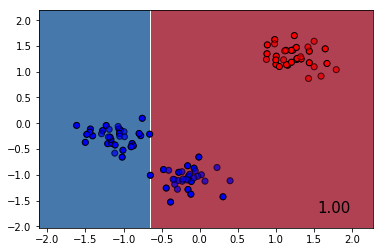

In [49]:
arbol = DecisionTreeClassifier(random_state=84)
muestra_limites(arbol, dataset_blobs)

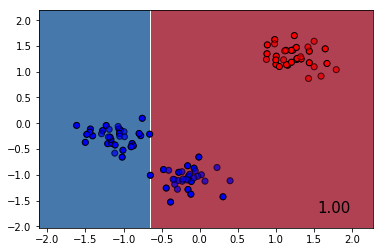

In [50]:
arbol = DecisionTreeClassifier()
muestra_limites(arbol, dataset_blobs)

ValueError: cannot reshape array of size 140556 into shape (212,221)

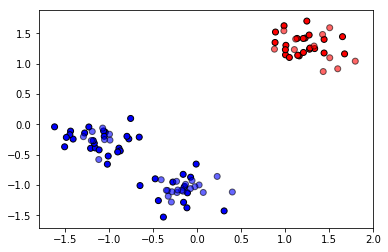

In [51]:
lr = LogisticRegression(random_state=84)
muestra_limites(lr, dataset_blobs)

ValueError: cannot reshape array of size 140556 into shape (212,221)

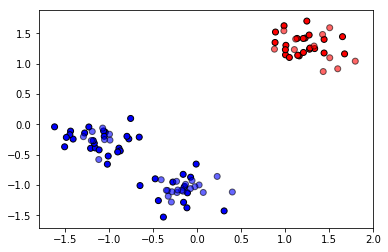

In [52]:
lr = LogisticRegression()
muestra_limites(lr, dataset_blobs)

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


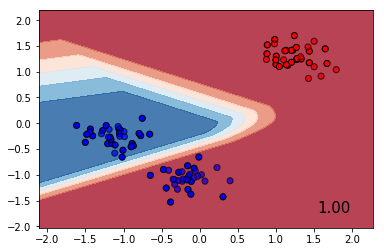

In [53]:
mp = MLPClassifier(hidden_layer_sizes=(5,2),learning_rate_init=0.01,momentum=0.9)
muestra_limites(mp, dataset_blobs)

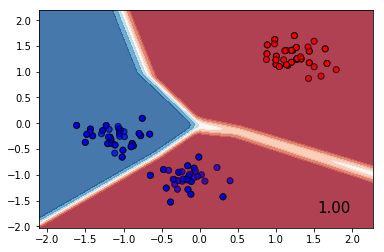

In [54]:
mp = MLPClassifier(hidden_layer_sizes=(5,4),learning_rate_init=0.1,momentum=0.8)
muestra_limites(mp, dataset_blobs)

ValueError: cannot reshape array of size 140556 into shape (212,221)

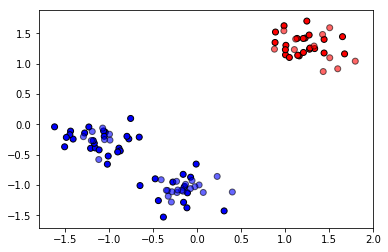

In [55]:
p = Perceptron(max_iter=10,eta0=1.0,random_state=84)
muestra_limites(p, dataset_blobs)

ValueError: cannot reshape array of size 140556 into shape (212,221)

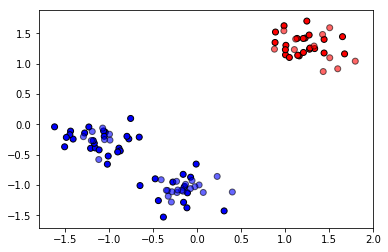

In [56]:
p = Perceptron(max_iter=50,eta0=1.0)
muestra_limites(p, dataset_blobs)

##### Dataset Hastie

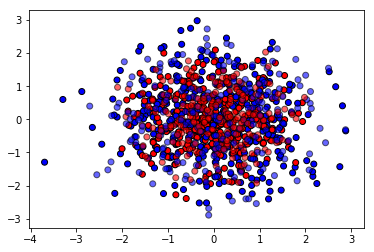

In [57]:
from sklearn.datasets import make_hastie_10_2
dataset_hastie = make_hastie_10_2(n_samples=1000,random_state=1)
muestra_dataset(dataset_hastie)

ValueError: X.shape[1] = 2 should be equal to 10, the number of features at training time

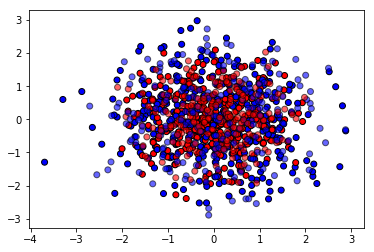

In [58]:
svc1 = SVC(kernel="sigmoid", C=0.025)
muestra_limites(svc1,dataset_hastie)

ValueError: query data dimension must match training data dimension

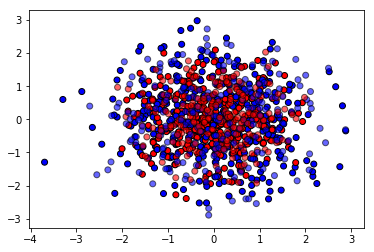

In [59]:
knn=KNeighborsClassifier(n_neighbors=5)
muestra_limites(knn,dataset_hastie)

ValueError: query data dimension must match training data dimension

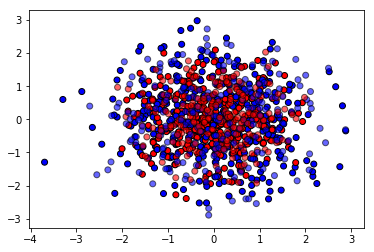

In [60]:
knn=KNeighborsClassifier(n_neighbors=7)
muestra_limites(knn,dataset_hastie)

ValueError: Number of features of the model must match the input. Model n_features is 10 and input n_features is 2 

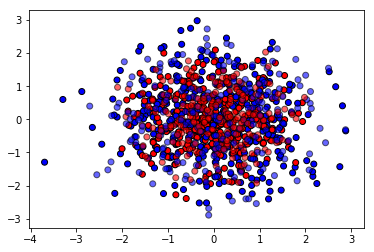

In [61]:
arbol = DecisionTreeClassifier(random_state=84)
muestra_limites(arbol, dataset_hastie)

ValueError: Number of features of the model must match the input. Model n_features is 10 and input n_features is 2 

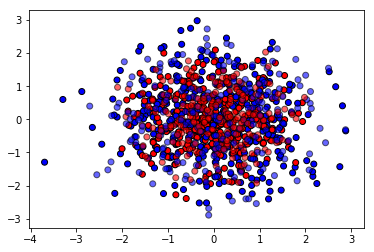

In [62]:
arbol = DecisionTreeClassifier()
muestra_limites(arbol, dataset_hastie)

ValueError: X has 2 features per sample; expecting 10

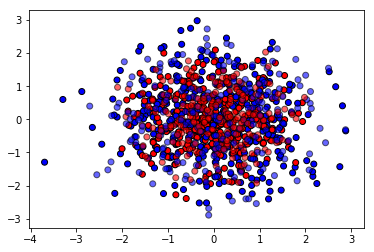

In [63]:
lr = LogisticRegression(random_state=84)
muestra_limites(lr, dataset_hastie)

ValueError: X has 2 features per sample; expecting 10

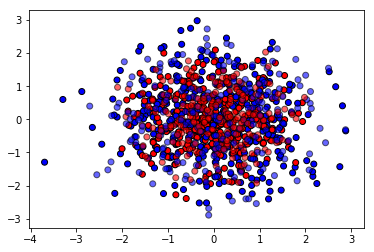

In [64]:
lr = LogisticRegression()
muestra_limites(lr, dataset_hastie)

ValueError: shapes (130376,2) and (10,5) not aligned: 2 (dim 1) != 10 (dim 0)

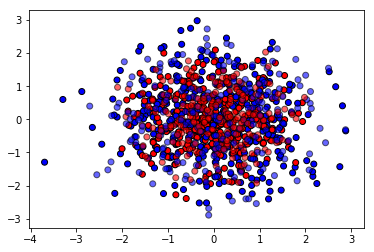

In [65]:
mp = MLPClassifier(hidden_layer_sizes=(5,2),learning_rate_init=0.01,momentum=0.9)
muestra_limites(mp, dataset_hastie)

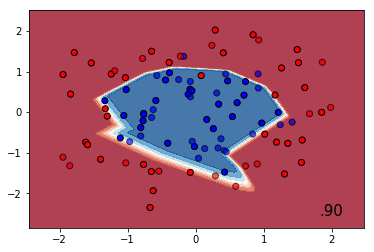

In [66]:
mp = MLPClassifier(hidden_layer_sizes=(5,4),learning_rate_init=0.1,momentum=0.8)
muestra_limites(mp, dataset_circles)

ValueError: X has 2 features per sample; expecting 10

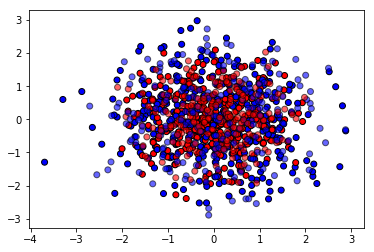

In [67]:
p = Perceptron(max_iter=10,eta0=1.0,random_state=84)
muestra_limites(p, dataset_hastie)

ValueError: X has 2 features per sample; expecting 10

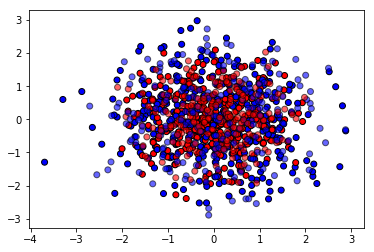

In [68]:
p = Perceptron(max_iter=50,eta0=1.0)
muestra_limites(p, dataset_hastie)

##### Dataset S-curve

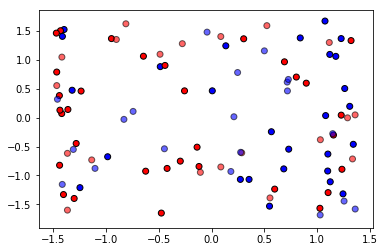

In [69]:
from sklearn.datasets import make_s_curve
dataset_s_curve = make_s_curve(random_state=42)
muestra_dataset(dataset_s_curve)

ValueError: Unknown label type: 'continuous'

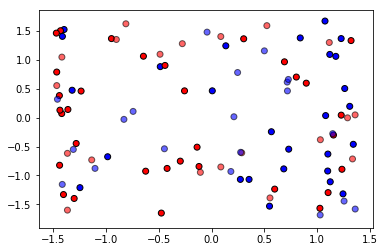

In [70]:
svc1 = SVC(kernel="sigmoid", C=0.025)
muestra_limites(svc1,dataset_s_curve)

ValueError: Unknown label type: 'continuous'

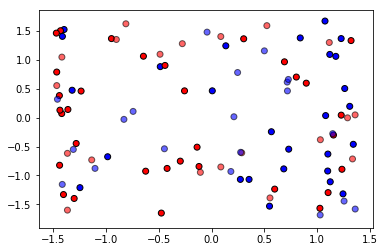

In [71]:
knn=KNeighborsClassifier(n_neighbors=5)
muestra_limites(knn,dataset_s_curve)

ValueError: Unknown label type: 'continuous'

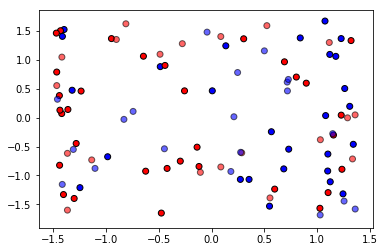

In [72]:
knn=KNeighborsClassifier(n_neighbors=7)
muestra_limites(knn,dataset_s_curve)

ValueError: Unknown label type: 'continuous'

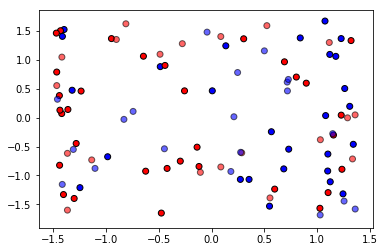

In [73]:
arbol = DecisionTreeClassifier(random_state=84)
muestra_limites(arbol, dataset_s_curve)

ValueError: Unknown label type: 'continuous'

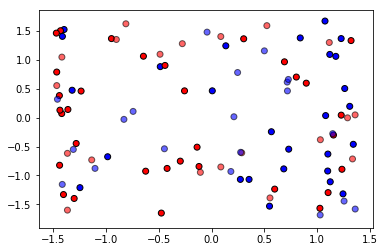

In [74]:
arbol = DecisionTreeClassifier()
muestra_limites(arbol, dataset_s_curve)

ValueError: Unknown label type: 'continuous'

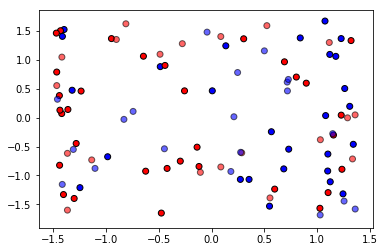

In [75]:
lr = LogisticRegression(random_state=84)
muestra_limites(lr, dataset_s_curve)

ValueError: Unknown label type: 'continuous'

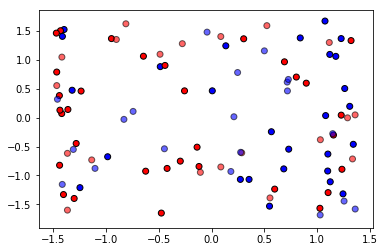

In [76]:
lr = LogisticRegression()
muestra_limites(lr, dataset_s_curve)

ValueError: Unknown label type: (array([-2.97017678,  4.38847852,  3.45112887, -0.05847513,  0.13415642,
       -1.967619  ,  1.16205747,  2.68772012,  3.09827803, -2.71114001,
       -0.41403064,  0.92983431,  0.23332387,  1.73635537,  0.95298653,
       -1.33392908, -4.16496383, -2.06464361, -1.84147184, -0.26186816,
       -3.8783668 , -3.69553624,  0.92268556,  3.8577539 ,  4.42573085,
        2.84813944, -1.7745813 , -4.00976572, -2.15498461, -0.68290981,
       -3.62034882, -0.04545655, -4.28613182,  0.44023401, -4.47281935,
       -2.86529402,  2.15834171, -4.09929216,  2.55380551, -1.64622285,
       -1.35006809, -1.78144965, -3.79185099, -4.27460415,  4.24788226,
        4.14217994, -3.39769032,  2.18649139, -1.25950995,  1.29644862,
        2.00978477,  1.94958454,  2.16398725, -1.59374857,  1.0541887 ,
       -1.04919183, -2.8395378 , -2.99872904,  2.45784118,  2.59306577]),)

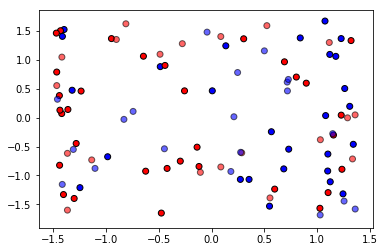

In [77]:
mp = MLPClassifier(hidden_layer_sizes=(5,2),learning_rate_init=0.01,momentum=0.9)
muestra_limites(mp, dataset_s_curve)

ValueError: Unknown label type: (array([-2.97017678,  4.38847852,  3.45112887, -0.05847513,  0.13415642,
       -1.967619  ,  1.16205747,  2.68772012,  3.09827803, -2.71114001,
       -0.41403064,  0.92983431,  0.23332387,  1.73635537,  0.95298653,
       -1.33392908, -4.16496383, -2.06464361, -1.84147184, -0.26186816,
       -3.8783668 , -3.69553624,  0.92268556,  3.8577539 ,  4.42573085,
        2.84813944, -1.7745813 , -4.00976572, -2.15498461, -0.68290981,
       -3.62034882, -0.04545655, -4.28613182,  0.44023401, -4.47281935,
       -2.86529402,  2.15834171, -4.09929216,  2.55380551, -1.64622285,
       -1.35006809, -1.78144965, -3.79185099, -4.27460415,  4.24788226,
        4.14217994, -3.39769032,  2.18649139, -1.25950995,  1.29644862,
        2.00978477,  1.94958454,  2.16398725, -1.59374857,  1.0541887 ,
       -1.04919183, -2.8395378 , -2.99872904,  2.45784118,  2.59306577]),)

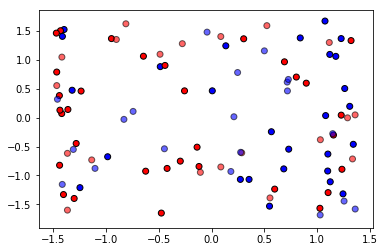

In [78]:
mp = MLPClassifier(hidden_layer_sizes=(5,4),learning_rate_init=0.1,momentum=0.8)
muestra_limites(mp, dataset_s_curve)

ValueError: Unknown label type: (array([-4.47281935, -4.28613182, -4.27460415, -4.16496383, -4.09929216,
       -4.00976572, -3.8783668 , -3.79185099, -3.69553624, -3.62034882,
       -3.39769032, -2.99872904, -2.97017678, -2.86529402, -2.8395378 ,
       -2.71114001, -2.15498461, -2.06464361, -1.967619  , -1.84147184,
       -1.78144965, -1.7745813 , -1.64622285, -1.59374857, -1.35006809,
       -1.33392908, -1.25950995, -1.04919183, -0.68290981, -0.41403064,
       -0.26186816, -0.05847513, -0.04545655,  0.13415642,  0.23332387,
        0.44023401,  0.92268556,  0.92983431,  0.95298653,  1.0541887 ,
        1.16205747,  1.29644862,  1.73635537,  1.94958454,  2.00978477,
        2.15834171,  2.16398725,  2.18649139,  2.45784118,  2.55380551,
        2.59306577,  2.68772012,  2.84813944,  3.09827803,  3.45112887,
        3.8577539 ,  4.14217994,  4.24788226,  4.38847852,  4.42573085]),)

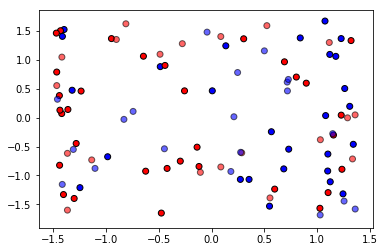

In [79]:
p = Perceptron(max_iter=10,eta0=1.0,random_state=84)
muestra_limites(p, dataset_s_curve)

ValueError: Unknown label type: (array([-4.47281935, -4.28613182, -4.27460415, -4.16496383, -4.09929216,
       -4.00976572, -3.8783668 , -3.79185099, -3.69553624, -3.62034882,
       -3.39769032, -2.99872904, -2.97017678, -2.86529402, -2.8395378 ,
       -2.71114001, -2.15498461, -2.06464361, -1.967619  , -1.84147184,
       -1.78144965, -1.7745813 , -1.64622285, -1.59374857, -1.35006809,
       -1.33392908, -1.25950995, -1.04919183, -0.68290981, -0.41403064,
       -0.26186816, -0.05847513, -0.04545655,  0.13415642,  0.23332387,
        0.44023401,  0.92268556,  0.92983431,  0.95298653,  1.0541887 ,
        1.16205747,  1.29644862,  1.73635537,  1.94958454,  2.00978477,
        2.15834171,  2.16398725,  2.18649139,  2.45784118,  2.55380551,
        2.59306577,  2.68772012,  2.84813944,  3.09827803,  3.45112887,
        3.8577539 ,  4.14217994,  4.24788226,  4.38847852,  4.42573085]),)

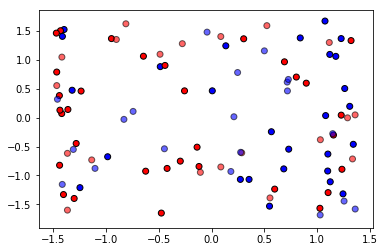

In [80]:
p = Perceptron(max_iter=50,eta0=1.0)
muestra_limites(p, dataset_s_curve)

##### Ejercicio 
Utiliza otros datasets disponibles en la librería sklearn: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets.

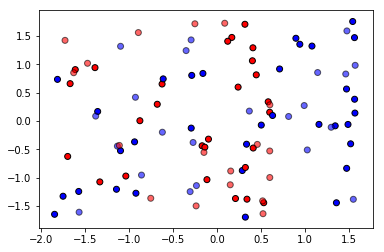

In [83]:
from sklearn.datasets import make_swiss_roll
dataset_swiss = make_swiss_roll()
muestra_dataset(dataset_swiss)

ValueError: Unknown label type: 'continuous'

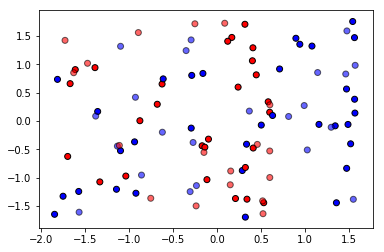

In [84]:
svc1 = SVC(kernel="sigmoid", C=0.025)
muestra_limites(svc1,dataset_swiss)

Guarda el fichero con tus soluciones. En este notebook se valorará tanto el número de algoritmos de clasificación que utilices como el número de datasets analizados. 